<a href="https://colab.research.google.com/github/Anirudh-Kannan/Fashion-MNIST-Classification/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Database  - Basic Classification 

###Import Statements

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt

###Loading Dataset

In [0]:
print(tf.version)

<module 'tensorflow._api.v1.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v1/version/__init__.py'>


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
y_train.shape

(60000,)

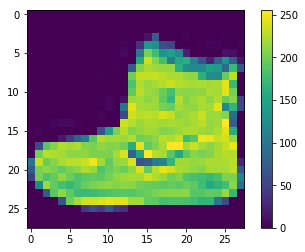

In [0]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

###Defining Model


In [0]:
model = keras.Sequential([
keras.layers.Flatten(input_shape = (28,28)),
keras.layers.Dense(128, tf.nn.relu),
keras.layers.Dense(10, tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
x_train = x_train/255
x_test = x_test/255

###Training

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4950 - acc: 0.8270
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3742 - acc: 0.8650
Epoch 3/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3353 - acc: 0.8768
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3091 - acc: 0.8868
Epoch 5/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2932 - acc: 0.8919
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2811 - acc: 0.8962
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2667 - acc: 0.9007
Epoch 8/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2559 - acc: 0.9051
Epoch 9/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2469 - acc: 0.9081
Epoch 10/10
60000/60000 [==============================] - 5s 81us/sample - loss: 

###Testing


In [0]:
(test_loss, test_accuracy) = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.3410 - acc: 0.8829


In [0]:
predictions = model.predict(np.expand_dims(x_test[0],0))

In [0]:
class_names[np.argmax(predictions)]
print(predictions)

[[3.0709377e-06 9.5892283e-10 6.4568326e-07 1.0717765e-11 7.6354257e-07
  2.0664043e-03 3.4273506e-07 6.3922994e-02 2.0094241e-07 9.3400550e-01]]


In [0]:
np.argmax(predictions)

9

###Saving the model

In [0]:
model.save("model.h5")

In [0]:
from google.colab import files
files.download("model.h5")